<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 800>

**Aditya Gumilar** <p>
**PYTN-KS05-002**

In [1]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from time import time
from six import StringIO
from sklearn import tree
from IPython.display import Image

plt.style.use("ggplot")

# Exploratory Dataset

In [2]:
# Load Dataset
df_baf = pd.read_csv('bank-additional-full.csv', sep=';')
df_baf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Mengecek missing values
df_baf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df_baf.describe(exclude='number') #Describe category
df_baf.describe().T #Describe numeric

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Melihat profil dari jumlah client yang berlangganan deposito

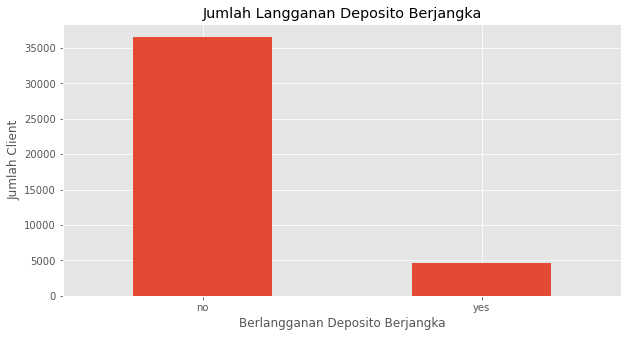

In [6]:
# Barchart
df_baf["y"].value_counts().plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.title("Jumlah Langganan Deposito Berjangka")
plt.ylabel("Jumlah Client") 
plt.xlabel("Berlangganan Deposito Berjangka")
plt.show()

Berdasarkan visualisasi pada gambar diatas, sebagian besar client tidak berlangganan deposito berjangka

## Menampilkan profil berdasarkan pekerjaan klien yang memiliki deposito berjangka atau tidak.

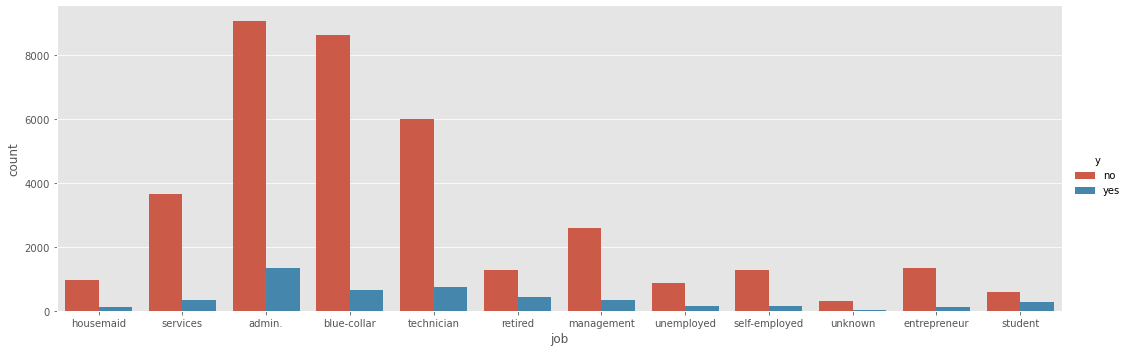

In [7]:
sns.catplot(x='job',hue='y',kind='count',data=df_baf, aspect=3, height=5)


Klien yang memiliki term deposit paling banyak adalah mereka yang bekerja sebagai admin diikuti oleh teknisi.

# Data Modeling

Karena semua parameter sudah memiliki tipe data dan tidak ada missing value, sekarang mari kita lihat kolom-kolom yang tidak berpotensi menjadi atribut model. **Contact, month, day_of_week, poutcome and duration** tidak akan digunakan dalam pembuatan model agar memiliki model yang prediktif dan realistis.

In [8]:
df_baf=df_baf.drop(columns=['day_of_week', 'month', 'contact','duration','poutcome'])
df_baf.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df_baf = df_baf.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
df_baf.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


# Training Model

In [11]:
# Siapkan fitur data (X) dan target (y)
X = df_baf.drop(["y"], axis=1)
y = df_baf["y"]

In [12]:
# Menggunakan beberapa fungsi metode machine learning, selanjutnya mengatur fungsi tsbt dalam running nya
def train_model(X, y, model, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    # Menampilkan data training dan data testing
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    
    # Melakukan standarisasi data dengan library standard scaller
    print("Standardizing data.....")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    # Menampilkan runtime waktu dalam proses eksekusi
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done, training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)
    
    print('')
    print('--------------------------------------------------------------')
    print("Training performance:")
    print(classification_report(y_train, train_prediction))
    print('--------------------------------------------------------------')
    
    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    print('--------------------------------------------------------------')
    
    print("Testing Data Confusion Matrix Visualitation")
    plot_confusion_matrix(model, X_test, y_test)

## Metode Logistic Regression

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training LogisticRegression in 0.086s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25557
         yes       0.71      0.19      0.30      3274

    accuracy                           0.90     28831
   macro avg       0.81      0.59      0.62     28831
weighted avg       0.88      0.90      0.87     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.69      0.18      0.28      1366

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

---------------------------------------------------------

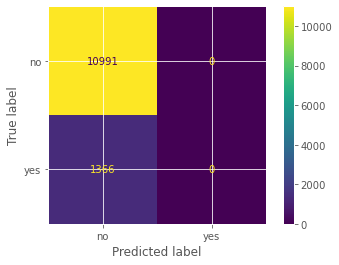

In [13]:
# Logistic Regression
train_model(X,y,LogisticRegression())

## Metode K-Nearest Neighbors

In [14]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [15]:
# Mencari nilai optimal untuk K
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.1443716112324998, 0.10949259529011895, 0.11467184591729385, 0.10601278627498584, 0.10892611475277171, 0.10520352836448976, 0.10633648943918426, 0.10496075099134095, 0.10641741523023387, 0.10398964149874565, 0.1046370478271425, 0.10407056728979526, 0.10487982520029134, 0.103504086752448, 0.10382778991664643, 0.10220927409565428, 0.10439427045399369, 0.10309945779719996, 0.1046370478271425, 0.10358501254349761, 0.10431334466294408, 0.10358501254349761, 0.1044751962450433, 0.10269482884195193, 0.10382778991664643, 0.10358501254349761, 0.10423241887189447, 0.10261390305090232, 0.10366593833454722, 0.10253297725985272, 0.10293760621510076, 0.101238164603059, 0.10220927409565428, 0.10229019988670389, 0.10269482884195193, 0.10196649672250546, 0.10188557093145585, 0.10220927409565428, 0.10220927409565428]


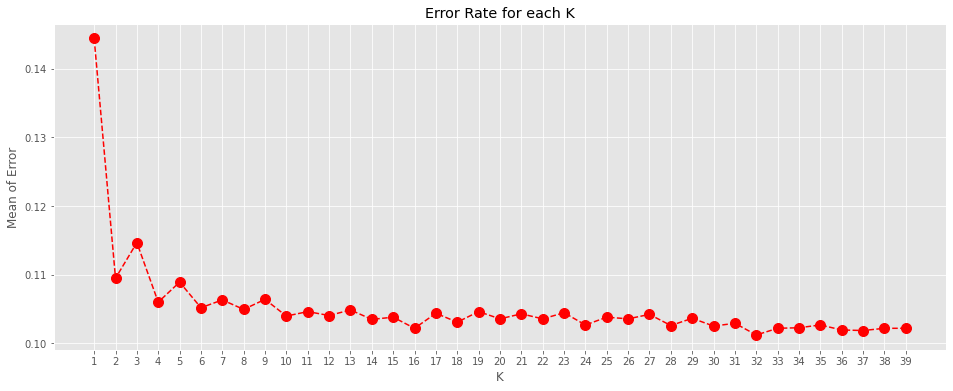

In [16]:
# Plot nilai error untuk setiap K
plt.figure(figsize=(16, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training KNeighborsClassifier in 0.357s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     25557
         yes       0.68      0.25      0.36      3274

    accuracy                           0.90     28831
   macro avg       0.79      0.62      0.65     28831
weighted avg       0.88      0.90      0.88     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10991
         yes       0.64      0.22      0.33      1366

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

-------------------------------------------------------

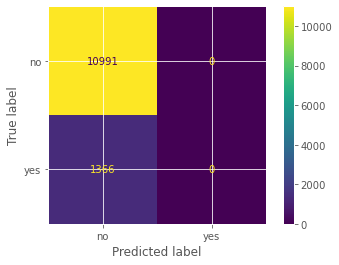

In [17]:
# Karena kesalahan terendah ada pada K=32, maka kita akan mengatur n_neighbors = 32
train_model(X,y,KNeighborsClassifier(n_neighbors=32))

## Support Vector Machine

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training SVC in 120.620s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     25557
         yes       0.64      0.21      0.32      3274

    accuracy                           0.90     28831
   macro avg       0.77      0.60      0.63     28831
weighted avg       0.88      0.90      0.87     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.63      0.20      0.30      1366

    accuracy                           0.90     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

--------------------------------------------------------------
Testing

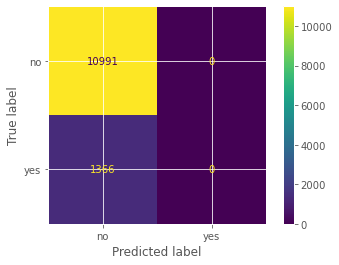

In [18]:
# SVM
train_model(X,y,SVC(kernel="linear"))

## Metode Decision Tree

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training DecisionTreeClassifier in 0.054s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25557
         yes       0.69      0.24      0.35      3274

    accuracy                           0.90     28831
   macro avg       0.80      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10991
         yes       0.64      0.22      0.32      1366

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

-----------------------------------------------------

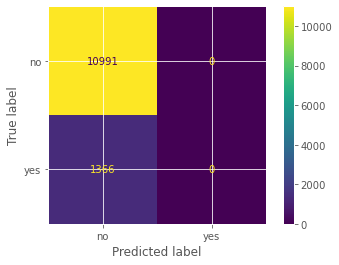

In [19]:
# DT
# mengatur max_depth = 5 agar iterasinya tidak terlalu lama
train_model(X,y,DecisionTreeClassifier(criterion="entropy", max_depth=5))

## Metode Random Forest 

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training RandomForestClassifier in 1.738s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.96      0.99      0.98     25557
         yes       0.94      0.66      0.78      3274

    accuracy                           0.96     28831
   macro avg       0.95      0.83      0.88     28831
weighted avg       0.96      0.96      0.95     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.95      0.94     10991
         yes       0.46      0.31      0.37      1366

    accuracy                           0.88     12357
   macro avg       0.69      0.63      0.65     12357
weighted avg       0.87      0.88      0.87     12357

-----------------------------------------------------

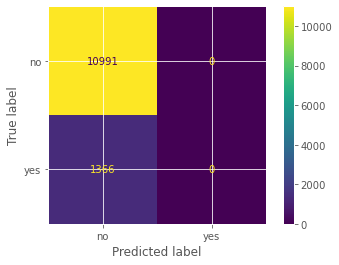

In [20]:
# RF
train_model(X,y,RandomForestClassifier())

## Metode Naive Bayes

Training with 28831 data.. Validating with 12357..
Standardizing data.....
Done, training GaussianNB in 0.035s

--------------------------------------------------------------
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.88      0.90     25557
         yes       0.34      0.51      0.41      3274

    accuracy                           0.83     28831
   macro avg       0.64      0.69      0.66     28831
weighted avg       0.87      0.83      0.85     28831

--------------------------------------------------------------
Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.87      0.90     10991
         yes       0.32      0.50      0.39      1366

    accuracy                           0.83     12357
   macro avg       0.63      0.68      0.64     12357
weighted avg       0.87      0.83      0.84     12357

--------------------------------------------------------------
Te

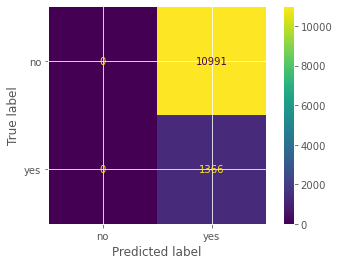

In [21]:
# NB
train_model(X,y,GaussianNB())

# Membandingkan setiap Metode yang digunakan

## Membuat tabel perbandingan nilai accuracy

In [28]:
comparison = {"Model": ['Logistic Regression', "KNN", "SVC", "Decision Tree", "Random Forest", "Naive Bayes"],
              "Training Accuracy": [0.90, 0.90, 0.90, 0.90, 0.96, 0.83],
              "Testing Accuracy": [0.90, 0.90, 0.90, 0.90, 0.88, 0.83],
              "Duration in Sec": [0.086, 0.357, 120.620, 0.054, 1.738, 0.035],
              }

table_comp = pd.DataFrame(comparison)
table_comp

,Model,Training Accuracy,Testing Accuracy,Duration in Sec
0,Logistic Regression,0.90,0.90,0.086
1,KNN,0.90,0.90,0.357
2,SVC,0.90,0.90,120.620
3,Decision Tree,0.90,0.90,0.054
4,Random Forest,0.96,0.88,1.738
5,Naive Bayes,0.83,0.83,0.035


## Hasil Analysis masing-masing metode 

1. **Logistic Regression:** Untuk akurasi pada training dan testing model memiliki nilai yang sama yaitu sebesar 0.90 dengan waktu eksekusi selama 0.086 detik. 

2. **K-Nearest Neighbors:** Untuk akurasi pada training dan testing model memiliki nilai yang sama yaitu sebesar 0.90 dengan waktu eksekusi selama 0.357 detik. Metode KNN memiliki nilai akurasi cukup baik, sama seperti logistic regression hanya saja waktu eksekusinya yang sedikit lebih lama

3. **Support Vector Machine:** Untuk akurasi pada training dan testing model memiliki nilai yang sama yaitu sebesar 0.90 dengan waktu eksekusi selama 120.620 detik. Metode SVM memiliki nilai akurasi cukup baik, sama seperti logistic regression dan KNN hanya saja waktu eksekusinya yang sedikit lebih lama dari keduanya.

4. **Decision Tree:** Untuk akurasi pada training dan testing model memiliki nilai yang sama yaitu sebesar 0.90 dengan waktu eksekusi selama 0.054 detik. Dapat dikatakan bahwa Decision Tree memiliki nilai akurasi yang cukup baik, sama seperti ketiga metode sebelumnya dan waktu eksekusi yang lebih cepat.

5. **Random Forest:** Random Forest memiliki waktu eksekusi selama 1.738 detik dan memiliki kinerja training model paling tinggi diantara metode lainnya, namun nilai accuracy pada metode ini turun menjadi 0.88. Sehingga dapat dikatakan bahwa performa dari metode ini kurang stabil dengan waktu eksekusi yang lumayan cukup lama

5. **Naive Bayes:** Tercatat bahwa metode Naive Bayes memiliki waktu eksekusi paling cepat, yaitu 0.035 detik. Sayangnya, kedua nilai accuracy pada training dan testing model cukup buruk jika dibandingkan dengan kelima metode lainnya, yaitu sebesar 0.83. Sehingga dapat dikatakan bahwa metode Naive bayes memiliki kinerja yang kurang baik.

# Overal Analysis

Dapat ditarik kesimpulan bahwa metode Decision Tree sangat cocok dalam menentukan jenis nilai dari (True Positif (TP), False Positif (FP), False Negative (FN), True Negative (TN)) untuk dataset Bank yang digunakan pada kasus ini. Meotde Decision Tree memiliki kinerja lebih baik jika dibandingkan dengan kelima metode lainnya karena mnemiliki masing-masing nilai akurasi pada training dan testing model sebesar 0.90, dengan waktu eksekusi selama 0.054 detik.